# Air quality: traitement, analyses statistiques et modélisation

# 1) Importation des bibliothèques

In [1]:
# Analyse 
import pandas as pd
import numpy as np

# Etude graphique
import matplotlib.pyplot as plt
import seaborn as sns

# Modélisation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score,accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

# Valeurs manquantes
import missingno as msno

# Suppression des alertes
import warnings
warnings.filterwarnings("ignore")

# Oversampling
from imblearn.over_sampling import SMOTE

# 2) Importation du dataset

In [2]:
df = pd.read_csv('table.csv')
df

,Unnamed: 0,Benzène,Dioxyde d'azote,Dioxyde de soufre,Ozone,Particules PM10,Particules fines PM2.5,DATE,type,geometry,...,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,SUNSET,SUNRISE,TEMPERATURE_NIGHT_C
0,0,NaN,11.0,NaN,55.0,8.80,NaN,2021-05-06,Feature,NaN,...,116,122,296,0.0,3,10.4,météo très défavorable,20:17:00,05:19:00,3
1,1,NaN,13.0,NaN,53.0,12.20,NaN,2021-05-07,Feature,NaN,...,116,116,116,0.0,2,14.5,météo très défavorable,20:18:00,05:17:00,3
2,2,NaN,8.0,NaN,43.0,10.40,NaN,2021-05-08,Feature,NaN,...,116,266,176,0.0,4,10.4,météo correcte,20:20:00,05:16:00,3
3,3,NaN,7.0,NaN,48.0,13.80,NaN,2021-05-09,Feature,NaN,...,386,353,353,0.0,5,9.4,météo défavorable,20:21:00,05:14:00,12
4,4,NaN,5.0,NaN,60.0,7.80,NaN,2021-05-10,Feature,NaN,...,353,122,353,0.0,3,10.5,météo défavorable,20:23:00,05:13:00,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9954,515,NaN,19.5,NaN,70.0,30.70,19.0,2022-04-28,Feature,NaN,...,113,113,113,0.0,5,14.5,météo favorable,21:01:00,06:27:00,5
9955,516,NaN,22.5,NaN,49.0,36.85,24.0,2022-04-29,Feature,NaN,...,122,119,119,0.0,3,11.3,météo défavorable,21:03:00,06:25:00,7
9956,517,NaN,22.5,NaN,49.0,36.85,24.0,2022-04-29,Feature,NaN,...,122,119,119,0.0,3,11.3,météo défavorable,21:03:00,06:25:00,7
9957,518,NaN,11.0,NaN,73.0,15.70,12.0,2022-04-30,Feature,NaN,...,116,113,113,0.0,4,14.5,météo correcte,21:04:00,06:23:00,4


# 3) Description et traitement

In [3]:
# Réindexage 
pd.set_option('display.max_columns', None)
df.reindex()

,Unnamed: 0,Benzène,Dioxyde d'azote,Dioxyde de soufre,Ozone,Particules PM10,Particules fines PM2.5,DATE,type,geometry,properties.gml_id,properties.aasqa,properties.date_maj,properties.partition_field,properties.code_no2,properties.code_o3,properties.code_pm10,properties.code_pm25,properties.code_qual,properties.code_so2,properties.code_zone,properties.coul_qual,properties.date_dif,properties.epsg_reg,properties.lib_qual,properties.lib_zone,properties.source,properties.type_zone,properties.x_reg,properties.x_wgs84,properties.y_reg,properties.y_wgs84,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,SUNSET,SUNRISE,TEMPERATURE_NIGHT_C
0,0,NaN,11.0,NaN,55.0,8.80,NaN,2021-05-06,Feature,NaN,365623018,32,2021/10/07 17:38:37.808+02,322021w18,1,2,1,1,2,1,80021,#50CCAA,2021/10/07,2154,Moyen,AMIENS,Atmo HDF,commune,648935.0,2.28980,6978201.0,49.90044,9,3,15,4,9,8,1.5,85,8.75,1011,83.000,9,6,1,116,122,296,0.0,3,10.4,météo très défavorable,20:17:00,05:19:00,3
1,1,NaN,13.0,NaN,53.0,12.20,NaN,2021-05-07,Feature,NaN,365626807,32,2021/10/07 17:38:37.808+02,322021w18,1,2,1,1,2,1,80021,#50CCAA,2021/10/07,2154,Moyen,AMIENS,Atmo HDF,commune,648935.0,2.28980,6978201.0,49.90044,12,3,14,4,11,11,0.1,90,9.00,1016,19.750,12,3,2,116,116,116,0.0,2,14.5,météo très défavorable,20:18:00,05:17:00,3
2,2,NaN,8.0,NaN,43.0,10.40,NaN,2021-05-08,Feature,NaN,365630596,32,2021/10/07 17:38:37.808+02,322021w18,1,2,1,1,2,1,80021,#50CCAA,2021/10/07,2154,Moyen,AMIENS,Atmo HDF,commune,648935.0,2.28980,6978201.0,49.90044,17,3,28,6,9,17,2.0,91,9.00,1018,61.000,18,13,2,116,266,176,0.0,4,10.4,météo correcte,20:20:00,05:16:00,3
3,3,NaN,7.0,NaN,48.0,13.80,NaN,2021-05-09,Feature,NaN,365634385,32,2021/10/07 17:38:37.808+02,322021w18,1,2,1,1,2,1,80021,#50CCAA,2021/10/07,2154,Moyen,AMIENS,Atmo HDF,commune,648935.0,2.28980,6978201.0,49.90044,20,12,31,14,20,17,5.2,91,9.00,1005,72.500,22,15,12,386,353,353,0.0,5,9.4,météo défavorable,20:21:00,05:14:00,12
4,4,NaN,5.0,NaN,60.0,7.80,NaN,2021-05-10,Feature,NaN,365638174,32,2021/10/07 17:38:37.808+02,322021w19,1,2,1,1,2,1,80021,#50CCAA,2021/10/07,2154,Moyen,AMIENS,Atmo HDF,commune,648935.0,2.28980,6978201.0,49.90044,16,11,27,11,15,14,2.1,92,9.75,1008,77.250,16,13,9,353,122,353,0.0,3,10.5,météo défavorable,20:23:00,05:13:00,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9954,515,NaN,19.5,NaN,70.0,30.70,19.0,2022-04-28,Feature,NaN,1738396237,32,2022/04/29 13:32:26.692+02,322022w17,1,3,2,2,3,1,59606,#F0E641,2022/04/29,2154,Dégradé,VALENCIENNES,Atmo HDF,commune,736780.0,3.51617,7029164.0,50.35911,20,5,18,5,20,20,0.0,90,10.00,1029,3.500,20,11,2,113,113,113,0.0,5,14.5,météo favorable,21:01:00,06:27:00,5
9955,516,NaN,22.5,NaN,49.0,36.85,24.0,2022-04-29,Feature,NaN,1743143186,32,2022/04/30 13:31:26.763+02,322022w17,1,2,2,3,3,1,59606,#F0E641,2022/04/30,2154,Dégradé,VALENCIENNES,Atmo HDF,commune,736780.0,3.51617,7029164.0,50.35911,16,7,17,7,14,15,0.0,84,10.00,1030,78.375,16,7,5,122,119,119,0.0,3,11.3,météo défavorable,21:03:00,06:25:00,7
9956,517,NaN,22.5,NaN,49.0,36.85,24.0,2022-04-29,Feature,NaN,1738396238,32,2022/04/29 13:32:26.692+02,322022w17,1,2,2,2,2,1,59606,#50CCAA,2022/04/29,2154,Moyen,VALENCIENNES,Atmo HDF,commune,736780.0,3.51617,7029164.0,50.35911,16,7,17,7,14,15,0.0,84,10.00,1030,78.375,16,7,5,122,119,119,0.0,3,11.3,météo défavorable,21:03:00,06:25:00,7
9957,518,NaN,11.0,NaN,73.0,15.70,12.0,2022-04-30,Feature,NaN,1746298149,32,2022/05/01 13:30:27.894+02,322022w17,1,2,1,1,2,1,59606,#50CCAA,2022/05/01,2154,Moyen,VALENCIENNES,Atmo HDF,commune,736780.0,3.516

In [4]:
# Suppression de colonnes sans intérêt
df = df.drop(['Unnamed: 0', 'type', 'geometry', 'properties.aasqa', 'properties.date_maj', 'properties.partition_field', 'properties.coul_qual', 'properties.date_dif', 'properties.epsg_reg', 'properties.x_reg', 'properties.x_wgs84', 'properties.y_reg', 'properties.y_wgs84', 'HEATINDEX_MAX_C', 'DEWPOINT_MAX_C', 'WINDTEMP_MAX_C', 'WEATHER_CODE_MORNING', 'WEATHER_CODE_NOON', 'WEATHER_CODE_EVENING'], axis = 1)
df

,Benzène,Dioxyde d'azote,Dioxyde de soufre,Ozone,Particules PM10,Particules fines PM2.5,DATE,properties.gml_id,properties.code_no2,properties.code_o3,properties.code_pm10,properties.code_pm25,properties.code_qual,properties.code_so2,properties.code_zone,properties.lib_qual,properties.lib_zone,properties.source,properties.type_zone,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,SUNSET,SUNRISE,TEMPERATURE_NIGHT_C
0,NaN,11.0,NaN,55.0,8.80,NaN,2021-05-06,365623018,1,2,1,1,2,1,80021,Moyen,AMIENS,Atmo HDF,commune,9,3,15,4,9,8,1.5,85,8.75,1011,83.000,0.0,3,10.4,météo très défavorable,20:17:00,05:19:00,3
1,NaN,13.0,NaN,53.0,12.20,NaN,2021-05-07,365626807,1,2,1,1,2,1,80021,Moyen,AMIENS,Atmo HDF,commune,12,3,14,4,11,11,0.1,90,9.00,1016,19.750,0.0,2,14.5,météo très défavorable,20:18:00,05:17:00,3
2,NaN,8.0,NaN,43.0,10.40,NaN,2021-05-08,365630596,1,2,1,1,2,1,80021,Moyen,AMIENS,Atmo HDF,commune,17,3,28,6,9,17,2.0,91,9.00,1018,61.000,0.0,4,10.4,météo correcte,20:20:00,05:16:00,3
3,NaN,7.0,NaN,48.0,13.80,NaN,2021-05-09,365634385,1,2,1,1,2,1,80021,Moyen,AMIENS,Atmo HDF,commune,20,12,31,14,20,17,5.2,91,9.00,1005,72.500,0.0,5,9.4,météo défavorable,20:21:00,05:14:00,12
4,NaN,5.0,NaN,60.0,7.80,NaN,2021-05-10,365638174,1,2,1,1,2,1,80021,Moyen,AMIENS,Atmo HDF,commune,16,11,27,11,15,14,2.1,92,9.75,1008,77.250,0.0,3,10.5,météo défavorable,20:23:00,05:13:00,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9954,NaN,19.5,NaN,70.0,30.70,19.0,2022-04-28,1738396237,1,3,2,2,3,1,59606,Dégradé,VALENCIENNES,Atmo HDF,commune,20,5,18,5,20,20,0.0,90,10.00,1029,3.500,0.0,5,14.5,météo favorable,21:01:00,06:27:00,5
9955,NaN,22.5,NaN,49.0,36.85,24.0,2022-04-29,1743143186,1,2,2,3,3,1,59606,Dégradé,VALENCIENNES,Atmo HDF,commune,16,7,17,7,14,15,0.0,84,10.00,1030,78.375,0.0,3,11.3,météo défavorable,21:03:00,06:25:00,7
9956,NaN,22.5,NaN,49.0,36.85,24.0,2022-04-29,1738396238,1,2,2,2,2,1,59606,Moyen,VALENCIENNES,Atmo HDF,commune,16,7,17,7,14,15,0.0,84,10.00,1030,78.375,0.0,3,11.3,météo défavorable,21:03:00,06:25:00,7
9957,NaN,11.0,NaN,73.0,15.70,12.0,2022-04-30,1746298149,1,2,1,1,2,1,59606,Moyen,VALENCIENNES,Atmo HDF,commune,16,4,22,4,16,15,0.0,95,10.00,1028,16.375,0.0,4,14.5,météo correcte,21:04:00,06:23:00,4


In [5]:
# Renommage des colonnes
df.rename(columns={'Benzène': 'C6H6', \
                   'Dioxyde d\'azote': 'NO2',\
                   'Dioxyde de soufre': 'SO2',\
                   'Ozone': 'O3',\
                   'Particules PM10': 'PM10',\
                   'Particules fines PM2.5': 'PM2.5',\
                   'DATE': 'date',\
                   'properties.gml_id': 'id',\
                   'properties.code_no2': 'code_no2',\
                   'properties.code_o3': 'code_o3',\
                   'properties.code_pm10': 'code_pm10',\
                   'properties.code_pm25': 'code_pm25',\
                   'properties.code_qual': 'ind_air',\
                   'properties.code_so2': 'code_so2',\
                   'properties.code_zone': 'code_com',\
                   'properties.lib_qual': 'air_qual',\
                   'properties.lib_zone': 'ville',\
                   'properties.source': 'source',\
                   'properties.type_zone': 'type_zone',\
                   'MAX_TEMPERATURE_C': 'Tc_max',\
                   'MIN_TEMPERATURE_C': 'Tc_min',\
                   'WINDSPEED_MAX_KMH': 'wind_max_kmh',\
                   'TEMPERATURE_MORNING_C': 'Tc_morning',\
                   'TEMPERATURE_NOON_C': 'Tc_afternoon',\
                   'TEMPERATURE_EVENING_C': 'Tc_evening',\
                   'PRECIP_TOTAL_DAY_MM': 'prec_tot_mm',\
                   'HUMIDITY_MAX_PERCENT': 'humidity_max_%',\
                   'VISIBILITY_AVG_KM': 'visibility_km',\
                   'PRESSURE_MAX_MB': 'press_atmo_mb',\
                   'CLOUDCOVER_AVG_PERCENT': 'cloud_cover_%',\
                   'TOTAL_SNOW_MM': 'snow_mm',\
                   'UV_INDEX': 'uv_index',\
                   'OPINION': 'meteo',\
                   'TEMPERATURE_NIGHT_C': 'Tc_night',}, inplace=True)
df

,C6H6,NO2,SO2,O3,PM10,PM2.5,date,id,code_no2,code_o3,code_pm10,code_pm25,ind_air,code_so2,code_com,air_qual,ville,source,type_zone,Tc_max,Tc_min,wind_max_kmh,Tc_morning,Tc_afternoon,Tc_evening,prec_tot_mm,humidity_max_%,visibility_km,press_atmo_mb,cloud_cover_%,snow_mm,uv_index,SUNHOUR,meteo,SUNSET,SUNRISE,Tc_night
0,NaN,11.0,NaN,55.0,8.80,NaN,2021-05-06,365623018,1,2,1,1,2,1,80021,Moyen,AMIENS,Atmo HDF,commune,9,3,15,4,9,8,1.5,85,8.75,1011,83.000,0.0,3,10.4,météo très défavorable,20:17:00,05:19:00,3
1,NaN,13.0,NaN,53.0,12.20,NaN,2021-05-07,365626807,1,2,1,1,2,1,80021,Moyen,AMIENS,Atmo HDF,commune,12,3,14,4,11,11,0.1,90,9.00,1016,19.750,0.0,2,14.5,météo très défavorable,20:18:00,05:17:00,3
2,NaN,8.0,NaN,43.0,10.40,NaN,2021-05-08,365630596,1,2,1,1,2,1,80021,Moyen,AMIENS,Atmo HDF,commune,17,3,28,6,9,17,2.0,91,9.00,1018,61.000,0.0,4,10.4,météo correcte,20:20:00,05:16:00,3
3,NaN,7.0,NaN,48.0,13.80,NaN,2021-05-09,365634385,1,2,1,1,2,1,80021,Moyen,AMIENS,Atmo HDF,commune,20,12,31,14,20,17,5.2,91,9.00,1005,72.500,0.0,5,9.4,météo défavorable,20:21:00,05:14:00,12
4,NaN,5.0,NaN,60.0,7.80,NaN,2021-05-10,365638174,1,2,1,1,2,1,80021,Moyen,AMIENS,Atmo HDF,commune,16,11,27,11,15,14,2.1,92,9.75,1008,77.250,0.0,3,10.5,météo défavorable,20:23:00,05:13:00,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9954,NaN,19.5,NaN,70.0,30.70,19.0,2022-04-28,1738396237,1,3,2,2,3,1,59606,Dégradé,VALENCIENNES,Atmo HDF,commune,20,5,18,5,20,20,0.0,90,10.00,1029,3.500,0.0,5,14.5,météo favorable,21:01:00,06:27:00,5
9955,NaN,22.5,NaN,49.0,36.85,24.0,2022-04-29,1743143186,1,2,2,3,3,1,59606,Dégradé,VALENCIENNES,Atmo HDF,commune,16,7,17,7,14,15,0.0,84,10.00,1030,78.375,0.0,3,11.3,météo défavorable,21:03:00,06:25:00,7
9956,NaN,22.5,NaN,49.0,36.85,24.0,2022-04-29,1738396238,1,2,2,2,2,1,59606,Moyen,VALENCIENNES,Atmo HDF,commune,16,7,17,7,14,15,0.0,84,10.00,1030,78.375,0.0,3,11.3,météo défavorable,21:03:00,06:25:00,7
9957,NaN,11.0,NaN,73.0,15.70,12.0,2022-04-30,1746298149,1,2,1,1,2,1,59606,Moyen,VALENCIENNES,Atmo HDF,commune,16,4,22,4,16,15,0.0,95,10.00,1028,16.375,0.0,4,14.5,météo correcte,21:04:00,06:23:00,4


In [6]:
# Liste des colonnes
df.columns

Index(['C6H6', 'NO2', 'SO2', 'O3', 'PM10', 'PM2.5', 'date', 'id', 'code_no2',
       'code_o3', 'code_pm10', 'code_pm25', 'ind_air', 'code_so2', 'code_com',
       'air_qual', 'ville', 'source', 'type_zone', 'Tc_max', 'Tc_min',
       'wind_max_kmh', 'Tc_morning', 'Tc_afternoon', 'Tc_evening',
       'prec_tot_mm', 'humidity_max_%', 'visibility_km', 'press_atmo_mb',
       'cloud_cover_%', 'snow_mm', 'uv_index', 'SUNHOUR', 'meteo', 'SUNSET',
       'SUNRISE', 'Tc_night'],
      dtype='object')

In [7]:
# Réindexage des colonnes
df = df.reindex(columns=['id', 'ville', 'code_com', \
                         'date', 'ind_air', 'air_qual', \
                         'C6H6', 'NO2', 'code_no2', 'SO2', 'code_so2', 'O3', 'code_o3', 'PM10', 'code_pm10', 'PM2.5', 'code_pm25', \
                         'source', 'type_zone', 'Tc_max', 'Tc_min', 'Tc_morning', 'Tc_afternoon', 'Tc_evening', 'Tc_night', \
                         'wind_max_kmh', 'prec_tot_mm', 'humidity_max_%', 'visibility_km', 'press_atmo_mb', \
                         'cloud_cover_%','snow_mm', 'uv_index', 'SUNHOUR', 'meteo', 'SUNSET', 'SUNRISE'])
df

,id,ville,code_com,date,ind_air,air_qual,C6H6,NO2,code_no2,SO2,code_so2,O3,code_o3,PM10,code_pm10,PM2.5,code_pm25,source,type_zone,Tc_max,Tc_min,Tc_morning,Tc_afternoon,Tc_evening,Tc_night,wind_max_kmh,prec_tot_mm,humidity_max_%,visibility_km,press_atmo_mb,cloud_cover_%,snow_mm,uv_index,SUNHOUR,meteo,SUNSET,SUNRISE
0,365623018,AMIENS,80021,2021-05-06,2,Moyen,NaN,11.0,1,NaN,1,55.0,2,8.80,1,NaN,1,Atmo HDF,commune,9,3,4,9,8,3,15,1.5,85,8.75,1011,83.000,0.0,3,10.4,météo très défavorable,20:17:00,05:19:00
1,365626807,AMIENS,80021,2021-05-07,2,Moyen,NaN,13.0,1,NaN,1,53.0,2,12.20,1,NaN,1,Atmo HDF,commune,12,3,4,11,11,3,14,0.1,90,9.00,1016,19.750,0.0,2,14.5,météo très défavorable,20:18:00,05:17:00
2,365630596,AMIENS,80021,2021-05-08,2,Moyen,NaN,8.0,1,NaN,1,43.0,2,10.40,1,NaN,1,Atmo HDF,commune,17,3,6,9,17,3,28,2.0,91,9.00,1018,61.000,0.0,4,10.4,météo correcte,20:20:00,05:16:00
3,365634385,AMIENS,80021,2021-05-09,2,Moyen,NaN,7.0,1,NaN,1,48.0,2,13.80,1,NaN,1,Atmo HDF,commune,20,12,14,20,17,12,31,5.2,91,9.00,1005,72.500,0.0,5,9.4,météo défavorable,20:21:00,05:14:00
4,365638174,AMIENS,80021,2021-05-10,2,Moyen,NaN,5.0,1,NaN,1,60.0,2,7.80,1,NaN,1,Atmo HDF,commune,16,11,11,15,14,13,27,2.1,92,9.75,1008,77.250,0.0,3,10.5,météo défavorable,20:23:00,05:13:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9954,1738396237,VALENCIENNES,59606,2022-04-28,3,Dégradé,NaN,19.5,1,NaN,1,70.0,3,30.70,2,19.0,2,Atmo HDF,commune,20,5,5,20,20,5,18,0.0,90,10.00,1029,3.500,0.0,5,14.5,météo favorable,21:01:00,06:27:00
9955,1743143186,VALENCIENNES,59606,2022-04-29,3,Dégradé,NaN,22.5,1,NaN,1,49.0,2,36.85,2,24.0,3,Atmo HDF,commune,16,7,7,14,15,7,17,0.0,84,10.00,1030,78.375,0.0,3,11.3,météo défavorable,21:03:00,06:25:00
9956,1738396238,VALENCIENNES,59606,2022-04-29,2,Moyen,NaN,22.5,1,NaN,1,49.0,2,36.85,2,24.0,2,Atmo HDF,commune,16,7,7,14,15,7,17,0.0,84,10.00,1030,78.375,0.0,3,11.3,météo défavorable,21:03:00,06:25:00
9957,1746298149,VALENCIENNES,59606,2022-04-30,2,Moyen,NaN,11.0,1,NaN,1,73.0,2,15.70,1,12.0,1,Atmo HDF,commune,16,4,4,16,15,4,22,0.0,95,10.00,1028,16.375,0.0,4,14.5,météo correcte,21:04:00,06:23:00


In [8]:
# Information sur le dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9959 entries, 0 to 9958
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              9959 non-null   int64  
 1   ville           9959 non-null   object 
 2   code_com        9959 non-null   int64  
 3   date            9959 non-null   object 
 4   ind_air         9959 non-null   int64  
 5   air_qual        9959 non-null   object 
 6   C6H6            744 non-null    float64
 7   NO2             7380 non-null   float64
 8   code_no2        9959 non-null   int64  
 9   SO2             1504 non-null   float64
 10  code_so2        9959 non-null   int64  
 11  O3              6403 non-null   float64
 12  code_o3         9959 non-null   int64  
 13  PM10            7731 non-null   float64
 14  code_pm10       9959 non-null   int64  
 15  PM2.5           4573 non-null   float64
 16  code_pm25       9959 non-null   int64  
 17  source          9959 non-null   o

Le dataset est constitué de 9959 lignes et de 37 colonnes.

Il est composé de variables quantitatives et qualitatives:

    - La variable cible est ind_air (indice de la qualité de l'air) : variable qualitative ordinale
    - Variables qualitatives nominales : 
    - Variables qualitatives ordinales: 
    - Variables quantitatives continues: 
    - Variables quantitatives discrètes: 
    - Variables alphabétiques: 
    
Du fait des différents dataset utilisés pour la constitution de cette table on constate de nombreuses valeurs manquantes concernant la mesure des polluants.

Certaines variables telles que 'date' feront l'objet d'une conversion de type.

In [9]:
# Variables numériques
df.drop(['id', 'code_com'],axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
ind_air,9959.0,2.297219,0.649457,1.00,2.00,2.000,2.00,5.00
C6H6,744.0,0.825282,1.204179,0.01,0.18,0.360,1.03,12.22
NO2,7380.0,17.457385,10.234643,1.00,10.00,15.500,23.00,67.00
code_no2,9959.0,1.312481,0.485123,0.00,1.00,1.000,2.00,4.00
SO2,1504.0,2.222407,3.679831,-3.00,0.50,1.000,3.00,31.00
code_so2,9959.0,1.038257,0.212206,1.00,1.00,1.000,1.00,4.00
O3,6403.0,45.678744,18.393458,-2.00,33.00,47.000,60.00,94.00
code_o3,9959.0,1.959835,0.492557,0.00,2.00,2.000,2.00,4.00
PM10,7731.0,19.209013,10.449209,1.90,12.00,16.700,23.60,88.60
code_pm10,9959.0,1.461894,0.667683,0.00,1.00,1.000,2.00,4.00


In [10]:
# Etude de l'indice de la qualité de l'air (% d'échantillons en fonction de ind_air)
df['ind_air'].value_counts() *100/ len(df['ind_air'])

2    76.473542
3    13.404960
4     8.464705
1     1.395722
5     0.261070
Name: ind_air, dtype: float64

In [11]:
# Idem avec air_qual --> Cette variable ne parait pas nécessaire du fait de l'existance de la variable ind_air
df['air_qual'].value_counts() *100/ len(df['air_qual'])

Moyen           76.473542
Dégradé         13.404960
Mauvais          8.464705
Bon              1.395722
Très mauvais     0.261070
Name: air_qual, dtype: float64

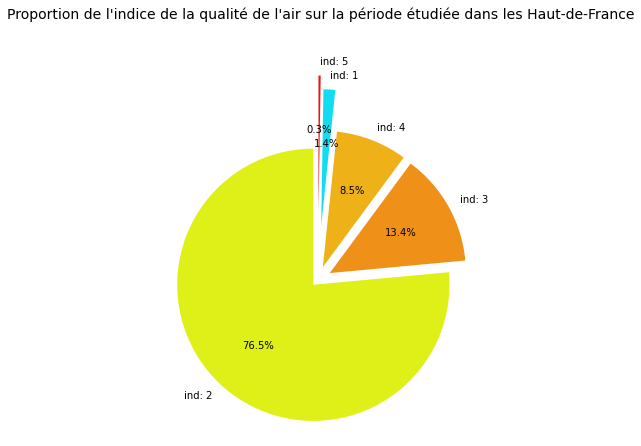

In [12]:
# Representation graphique de la quantité d'échantillons en fonction de ind_air
ind_air = df['ind_air'].value_counts()
fig, ax = plt.subplots(figsize=(7, 7))
labels = 'ind: 2', 'ind: 3', 'ind: 4', 'ind: 1', 'ind: 5'
colors = ['#DFEF18', '#EF9118', '#EFB118', '#12DCF0', '#F01212']
explode = (0.05, 0.1, 0.1, 0.4, 0.5)
ax.pie(ind_air, labels=labels, autopct='%1.1f%%', colors=colors, shadow=False, startangle=90, explode=explode)
ax.axis('equal')
plt.title('Proportion de l\'indice de la qualité de l\'air sur la période étudiée dans les Haut-de-France', fontsize=14, pad=40)
plt.show()

On constate que durant cette période dans la région, la qualité de l'air est principalement moyenne (76.5%). 
Dégradé: 13.4%
Mauvais: 8.5%
Bon: 1.4%
Très mauvais: 0.26%

On note cette grande disproportion entre le nombre d'échantillons des différents indices de la qualité de l'air. Cela posera problème lors de la modélisation. L'utilisation d'un SMOTE pourrait peut-être palier à ce biaie.

In [13]:
# Nombre de lignes pour les 19 villes étudiées de la région
df['ville'].value_counts()

AMIENS                  554
SANGATTE                552
SAINT OMER              552
ROYE                    526
BEAUVAIS                520
SAINT AMAND LES EAUX    520
ROUBAIX                 520
NOGENT SUR OISE         520
MAUBEUGE                520
LENS                    520
GRAVELINES              520
DUNKERQUE               520
DOUAI                   520
CREIL                   520
CALAIS                  520
BOULOGNE SUR MER        520
VALENCIENNES            520
BETHUNE                 517
LILLE                   498
Name: ville, dtype: int64

In [14]:
# Conversion du type date
df['date'] = pd.to_datetime(df['date']).dt.date
df['date'] = pd.to_datetime(df['date'])
df['date'].astype

<bound method NDFrame.astype of 0      2021-05-06
1      2021-05-07
2      2021-05-08
3      2021-05-09
4      2021-05-10
          ...    
9954   2022-04-28
9955   2022-04-29
9956   2022-04-29
9957   2022-04-30
9958   2022-04-30
Name: date, Length: 9959, dtype: datetime64[ns]>

In [15]:
df['date'].sort_values(ascending= True)

0      2021-05-06
1074   2021-05-06
8887   2021-05-06
1591   2021-05-06
8335   2021-05-06
          ...    
3670   2022-04-30
3669   2022-04-30
5727   2022-04-30
8885   2022-04-30
9958   2022-04-30
Name: date, Length: 9959, dtype: datetime64[ns]

Les données journalières concernent la période du 06/05/2021 au 30/04/2022

In [16]:
# CREATION D'UNE FONCTION POUR DETERMINER LE NOMBRE ET LE POURCENTAGE DE VALEURS MANQUANTES
def missing_data (select, df):
    missing_data_count = df[select].isna().sum()
    missing_data_percent = df[select].isna().sum() / len(df[select]) * 100
    missing_data = pd.DataFrame({
        'Nombre_NaN': missing_data_count,
        '%_NaN': missing_data_percent
        })
    missing_data = missing_data[missing_data.Nombre_NaN > 0]
    missing_data.sort_values(by='Nombre_NaN', ascending=False, inplace=True)

    print(f"Il y a {missing_data.shape[0]} variables avec des valeurs manquantes.\n")
    return missing_data

In [17]:
missing_data(df.columns, df)

Il y a 6 variables avec des valeurs manquantes.



,Nombre_NaN,%_NaN
C6H6,9215,92.529370
SO2,8455,84.898082
PM2.5,5386,54.081735
O3,3556,35.706396
NO2,2579,25.896174
PM10,2228,22.371724


Les valeurs manquantes concernent la totalité des polluants mesurés dans les Hauts-de-France, dont 92.5% pour le benzène et 22.3% pour les particules fines inférieures à 10µm.

In [18]:
# Etude préliminaire des corrélations entre les variables numériques
num_corr = df.drop('id',axis=1).corr()
num_corr

,code_com,ind_air,C6H6,NO2,code_no2,SO2,code_so2,O3,code_o3,PM10,code_pm10,PM2.5,code_pm25,Tc_max,Tc_min,Tc_morning,Tc_afternoon,Tc_evening,Tc_night,wind_max_kmh,prec_tot_mm,humidity_max_%,visibility_km,press_atmo_mb,cloud_cover_%,snow_mm,uv_index,SUNHOUR
code_com,1.000000,-0.030307,-0.291428,-0.085057,-0.118301,-0.015587,-0.099847,-0.017629,0.004008,-0.049470,-0.045687,0.002378,-0.031029,0.016684,-0.063006,-0.056130,0.012605,-0.021614,-0.061980,-0.063030,0.003232,0.084516,-0.028391,0.007908,-0.015972,0.002210,-0.015007,0.000635
ind_air,-0.030307,1.000000,0.378171,0.427189,0.334049,0.045852,0.108394,-0.209759,0.127731,0.709956,0.657416,0.773551,0.803862,0.047525,-0.104694,-0.138933,0.022059,0.028148,-0.121454,-0.283430,-0.131920,-0.245182,0.121427,0.275084,-0.380226,-0.061208,0.069449,0.181400
C6H6,-0.291428,0.378171,1.000000,0.364888,0.063051,0.117789,0.155267,0.013008,0.122962,0.555777,0.431922,0.448198,0.359824,-0.060919,-0.017142,-0.024054,-0.043079,-0.044657,-0.014484,-0.068762,0.009180,-0.148334,0.028806,0.196000,-0.187944,-0.027220,0.014969,0.126867
NO2,-0.085057,0.427189,0.364888,1.000000,0.533836,0.017557,0.048624,-0.634874,-0.211895,0.570125,0.486415,0.656168,0.553290,-0.209042,-0.368853,-0.400177,-0.237837,-0.261927,-0.379554,-0.453876,-0.185579,-0.101270,0.071362,0.371534,-0.306438,-0.009063,-0.204092,-0.103911
code_no2,-0.118301,0.334049,0.063051,0.533836,1.000000,0.075231,0.156023,-0.413454,-0.111372,0.371260,0.388651,0.388184,0.427706,-0.112833,-0.162125,-0.187519,-0.123273,-0.142878,-0.165469,-0.338914,-0.116749,-0.123670,0.106380,0.305464,-0.236282,-0.018783,-0.095053,-0.025090
SO2,-0.015587,0.045852,0.117789,0.017557,0.075231,1.000000,-0.038915,-0.015238,0.072307,0.265089,0.100188,-0.108884,0.046865,0.008947,0.008612,0.005191,0.020516,0.022871,0.008067,0.020994,-0.013630,-0.077597,-0.027508,0.018458,-0.054428,0.017633,0.039307,0.085593
code_so2,-0.099847,0.108394,0.155267,0.048624,0.156023,-0.038915,1.000000,-0.028584,-0.005474,0.114271,0.126172,0.088112,0.098798,-0.041245,0.021222,0.015735,-0.031925,-0.021475,0.018151,-0.026491,0.011527,-0.057883,0.053846,0.045284,-0.038207,-0.014485,0.001880,-0.007729
O3,-0.017629,-0.209759,0.013008,-0.634874,-0.413454,-0.015238,-0.028584,1.000000,0.553124,-0.295852,-0.339746,-0.450034,-0.443548,0.276252,0.288866,0.305853,0.291049,0.339360,0.299391,0.450798,0.145519,-0.102653,0.025710,-0.354015,0.160684,0.046217,0.256591,0.292873
code_o3,0.004008,0.127731,0.122962,-0.211895,-0.111372,0.072307,-0.005474,0.553124,1.000000,-0.025371,-0.106337,-0.144294,-0.184645,0.413204,0.303690,0.295547,0.415099,0.432339,0.305062,0.118785,0.007391,-0.181125,0.147193,-0.152884,-0.107619,-0.047230,0.374911,0.338737
PM10,-0.049470,0.709956,0.555777,0.570125,0.371260,0.265089,0.114271,-0.295852,-0.025371,1.000000,0.765050,0.901569,0.777333,0.017051,-0.090017,-0.143256,-0.002284,0.006858,-0.114010,-0.248289,-0.179704,-0.281641,0.176275,0.356731,-0.416598,-0.068131,0.065204,0.188669


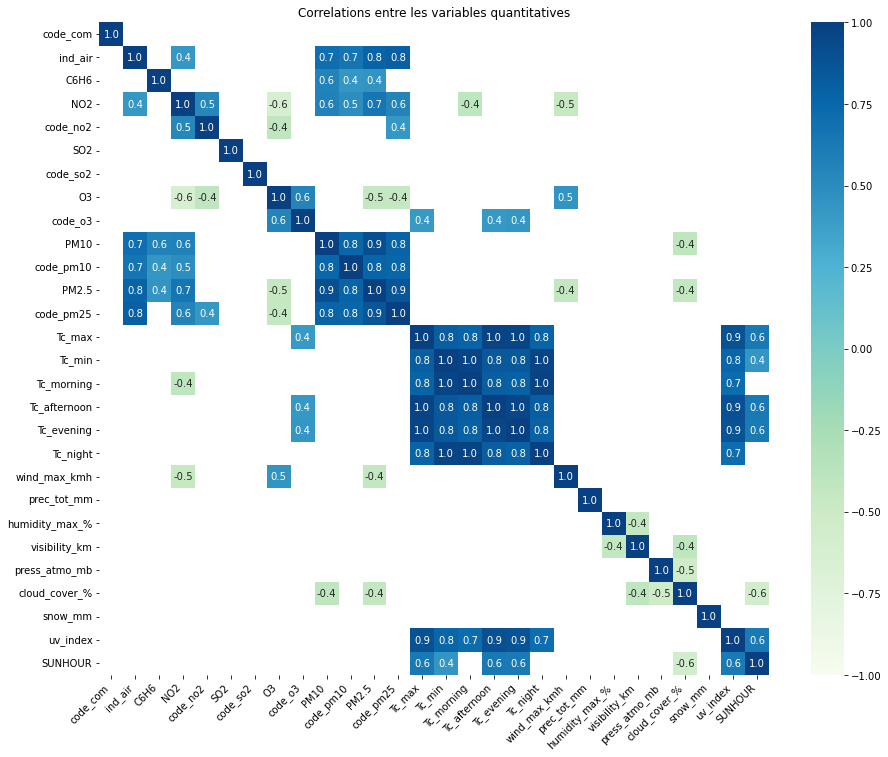

In [19]:
num_corr = num_corr[abs(num_corr) >= 0.4]
plt.figure(figsize=(15, 12))
g = sns.heatmap(num_corr,
            annot=True,
            fmt='.1f',
            cmap='GnBu',
            vmin=-1,
            vmax=1)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
title = plt.title('Correlations entre les variables quantitatives')

On constate une assez forte corrélation positive entre les particules fines (10 et 2.5) et l'indice de la qualité de l'air. En revanche, on aurait pu s'attendre à des corrélation entre l'indice de la qualité de l'air et des variables météorologiques telles que les précipitations, la vitesse du vent ou encore les températures, ce qui n'est pas observé ici.

Par la suite, il serait peut-être interéssant d'étudier ces paramètres en fonction de la date et de la zone géographique ou des villes, mais aussi pour chaque indice de la qualité de l'air. Il serait aussi enviseageable de tenter un remplacement des valeurs manquante après une étude plus poussées.

Etant données la quantité de valeurs manquantes concernant les polluants, il est préférable de se baser sur les code polluants qui refletent la mesure des polluants:
https://www.atmo-hdf.fr/tout-savoir-sur-l-air/indice-de-la-qualite-de-l-air.html
De ce fait, les colonnes des polluants mesurés sont supprimées.

In [20]:
df = df.drop(['C6H6', 'NO2', 'SO2', 'O3', 'PM10', 'PM2.5'], axis=1)
df

,id,ville,code_com,date,ind_air,air_qual,code_no2,code_so2,code_o3,code_pm10,code_pm25,source,type_zone,Tc_max,Tc_min,Tc_morning,Tc_afternoon,Tc_evening,Tc_night,wind_max_kmh,prec_tot_mm,humidity_max_%,visibility_km,press_atmo_mb,cloud_cover_%,snow_mm,uv_index,SUNHOUR,meteo,SUNSET,SUNRISE
0,365623018,AMIENS,80021,2021-05-06,2,Moyen,1,1,2,1,1,Atmo HDF,commune,9,3,4,9,8,3,15,1.5,85,8.75,1011,83.000,0.0,3,10.4,météo très défavorable,20:17:00,05:19:00
1,365626807,AMIENS,80021,2021-05-07,2,Moyen,1,1,2,1,1,Atmo HDF,commune,12,3,4,11,11,3,14,0.1,90,9.00,1016,19.750,0.0,2,14.5,météo très défavorable,20:18:00,05:17:00
2,365630596,AMIENS,80021,2021-05-08,2,Moyen,1,1,2,1,1,Atmo HDF,commune,17,3,6,9,17,3,28,2.0,91,9.00,1018,61.000,0.0,4,10.4,météo correcte,20:20:00,05:16:00
3,365634385,AMIENS,80021,2021-05-09,2,Moyen,1,1,2,1,1,Atmo HDF,commune,20,12,14,20,17,12,31,5.2,91,9.00,1005,72.500,0.0,5,9.4,météo défavorable,20:21:00,05:14:00
4,365638174,AMIENS,80021,2021-05-10,2,Moyen,1,1,2,1,1,Atmo HDF,commune,16,11,11,15,14,13,27,2.1,92,9.75,1008,77.250,0.0,3,10.5,météo défavorable,20:23:00,05:13:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9954,1738396237,VALENCIENNES,59606,2022-04-28,3,Dégradé,1,1,3,2,2,Atmo HDF,commune,20,5,5,20,20,5,18,0.0,90,10.00,1029,3.500,0.0,5,14.5,météo favorable,21:01:00,06:27:00
9955,1743143186,VALENCIENNES,59606,2022-04-29,3,Dégradé,1,1,2,2,3,Atmo HDF,commune,16,7,7,14,15,7,17,0.0,84,10.00,1030,78.375,0.0,3,11.3,météo défavorable,21:03:00,06:25:00
9956,1738396238,VALENCIENNES,59606,2022-04-29,2,Moyen,1,1,2,2,2,Atmo HDF,commune,16,7,7,14,15,7,17,0.0,84,10.00,1030,78.375,0.0,3,11.3,météo défavorable,21:03:00,06:25:00
9957,1746298149,VALENCIENNES,59606,2022-04-30,2,Moyen,1,1,2,1,1,Atmo HDF,commune,16,4,4,16,15,4,22,0.0,95,10.00,1028,16.375,0.0,4,14.5,météo correcte,21:04:00,06:23:00


In [21]:
# Suppression des doublons de date pour chaque ville
df.drop_duplicates(subset =['ville', 'date'], keep = 'first', inplace=True)
df

,id,ville,code_com,date,ind_air,air_qual,code_no2,code_so2,code_o3,code_pm10,code_pm25,source,type_zone,Tc_max,Tc_min,Tc_morning,Tc_afternoon,Tc_evening,Tc_night,wind_max_kmh,prec_tot_mm,humidity_max_%,visibility_km,press_atmo_mb,cloud_cover_%,snow_mm,uv_index,SUNHOUR,meteo,SUNSET,SUNRISE
0,365623018,AMIENS,80021,2021-05-06,2,Moyen,1,1,2,1,1,Atmo HDF,commune,9,3,4,9,8,3,15,1.5,85,8.75,1011,83.000,0.0,3,10.4,météo très défavorable,20:17:00,05:19:00
1,365626807,AMIENS,80021,2021-05-07,2,Moyen,1,1,2,1,1,Atmo HDF,commune,12,3,4,11,11,3,14,0.1,90,9.00,1016,19.750,0.0,2,14.5,météo très défavorable,20:18:00,05:17:00
2,365630596,AMIENS,80021,2021-05-08,2,Moyen,1,1,2,1,1,Atmo HDF,commune,17,3,6,9,17,3,28,2.0,91,9.00,1018,61.000,0.0,4,10.4,météo correcte,20:20:00,05:16:00
3,365634385,AMIENS,80021,2021-05-09,2,Moyen,1,1,2,1,1,Atmo HDF,commune,20,12,14,20,17,12,31,5.2,91,9.00,1005,72.500,0.0,5,9.4,météo défavorable,20:21:00,05:14:00
4,365638174,AMIENS,80021,2021-05-10,2,Moyen,1,1,2,1,1,Atmo HDF,commune,16,11,11,15,14,13,27,2.1,92,9.75,1008,77.250,0.0,3,10.5,météo défavorable,20:23:00,05:13:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9948,1714793700,VALENCIENNES,59606,2022-04-26,2,Moyen,1,1,2,2,2,Atmo HDF,commune,15,4,4,14,14,7,17,0.0,96,9.00,1023,49.750,0.0,3,9.4,météo correcte,20:58:00,06:31:00
9949,1714793701,VALENCIENNES,59606,2022-04-27,3,Dégradé,2,1,2,2,3,Atmo HDF,commune,18,3,3,15,18,3,16,0.0,96,8.00,1026,13.500,0.0,4,11.6,météo favorable,20:59:00,06:29:00
9953,1730508452,VALENCIENNES,59606,2022-04-28,3,Dégradé,1,1,3,2,2,Atmo HDF,commune,20,5,5,20,20,5,18,0.0,90,10.00,1029,3.500,0.0,5,14.5,météo favorable,21:01:00,06:27:00
9955,1743143186,VALENCIENNES,59606,2022-04-29,3,Dégradé,1,1,2,2,3,Atmo HDF,commune,16,7,7,14,15,7,17,0.0,84,10.00,1030,78.375,0.0,3,11.3,météo défavorable,21:03:00,06:25:00


Lors de l'établissement de cette table, différents dataset ont été assemblé. Pour certaine ville, il y avait 2 stations de mesures d'où des doublons. Il a été choisi de manière arbitraire de ne garder que la première ligne de chaque doublon.

In [22]:
# Création d'un indice pour meteo et conversion en int
df['meteo'].value_counts()

météo défavorable         2057
météo correcte            1620
météo très défavorable    1600
météo favorable           1188
météo idéale                37
Name: meteo, dtype: int64

In [23]:
df['meteo'] = df['meteo'].apply(lambda x : x.replace('météo très défavorable', '0'))
df['meteo'] = df['meteo'].apply(lambda x : x.replace('météo défavorable', '1'))
df['meteo'] = df['meteo'].apply(lambda x : x.replace('météo correcte', '2'))
df['meteo'] = df['meteo'].apply(lambda x : x.replace('météo favorable', '3'))
df['meteo'] = df['meteo'].apply(lambda x : x.replace('météo idéale', '4'))
df['meteo'] = df['meteo'].astype(int)
df['meteo'].dtype

dtype('int32')

In [24]:
# Suppression des colonnes id, air_qual, source, type_zone, code_com, SUNSET et SUNRISE --> Pas d'intérêt majeur

In [25]:
df = df.drop(['id', 'air_qual', 'source', 'type_zone', 'code_com', 'SUNSET', 'SUNRISE'], axis=1)
df

,ville,date,ind_air,code_no2,code_so2,code_o3,code_pm10,code_pm25,Tc_max,Tc_min,Tc_morning,Tc_afternoon,Tc_evening,Tc_night,wind_max_kmh,prec_tot_mm,humidity_max_%,visibility_km,press_atmo_mb,cloud_cover_%,snow_mm,uv_index,SUNHOUR,meteo
0,AMIENS,2021-05-06,2,1,1,2,1,1,9,3,4,9,8,3,15,1.5,85,8.75,1011,83.000,0.0,3,10.4,0
1,AMIENS,2021-05-07,2,1,1,2,1,1,12,3,4,11,11,3,14,0.1,90,9.00,1016,19.750,0.0,2,14.5,0
2,AMIENS,2021-05-08,2,1,1,2,1,1,17,3,6,9,17,3,28,2.0,91,9.00,1018,61.000,0.0,4,10.4,2
3,AMIENS,2021-05-09,2,1,1,2,1,1,20,12,14,20,17,12,31,5.2,91,9.00,1005,72.500,0.0,5,9.4,1
4,AMIENS,2021-05-10,2,1,1,2,1,1,16,11,11,15,14,13,27,2.1,92,9.75,1008,77.250,0.0,3,10.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9948,VALENCIENNES,2022-04-26,2,1,1,2,2,2,15,4,4,14,14,7,17,0.0,96,9.00,1023,49.750,0.0,3,9.4,2
9949,VALENCIENNES,2022-04-27,3,2,1,2,2,3,18,3,3,15,18,3,16,0.0,96,8.00,1026,13.500,0.0,4,11.6,3
9953,VALENCIENNES,2022-04-28,3,1,1,3,2,2,20,5,5,20,20,5,18,0.0,90,10.00,1029,3.500,0.0,5,14.5,3
9955,VALENCIENNES,2022-04-29,3,1,1,2,2,3,16,7,7,14,15,7,17,0.0,84,10.00,1030,78.375,0.0,3,11.3,1


# 4) Etude des corrélations pour chacun des indices (1 à 5)

In [26]:
# Etude des corrélation uniquement pour ind_air = 5
df_5 = df[df['ind_air']== 5]
print(df_5.shape)

(14, 24)


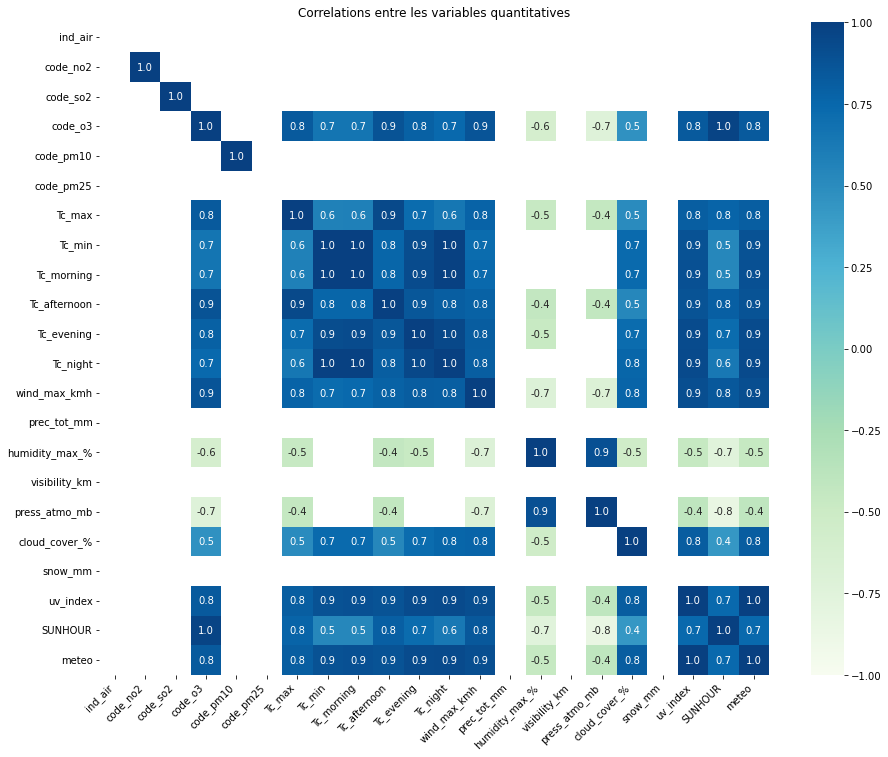

In [27]:
num_corr = df_5.corr()

num_corr = num_corr[abs(num_corr) >= 0.4]
plt.figure(figsize=(15, 12))
g = sns.heatmap(num_corr,
            annot=True,
            fmt='.1f',
            cmap='GnBu',
            vmin=-1,
            vmax=1)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
title = plt.title('Correlations entre les variables quantitatives')

En isolant l'ind_air = 5, on constate de forte corrélation entre code_O3 et des paramètres météorologiques.

(505, 24)


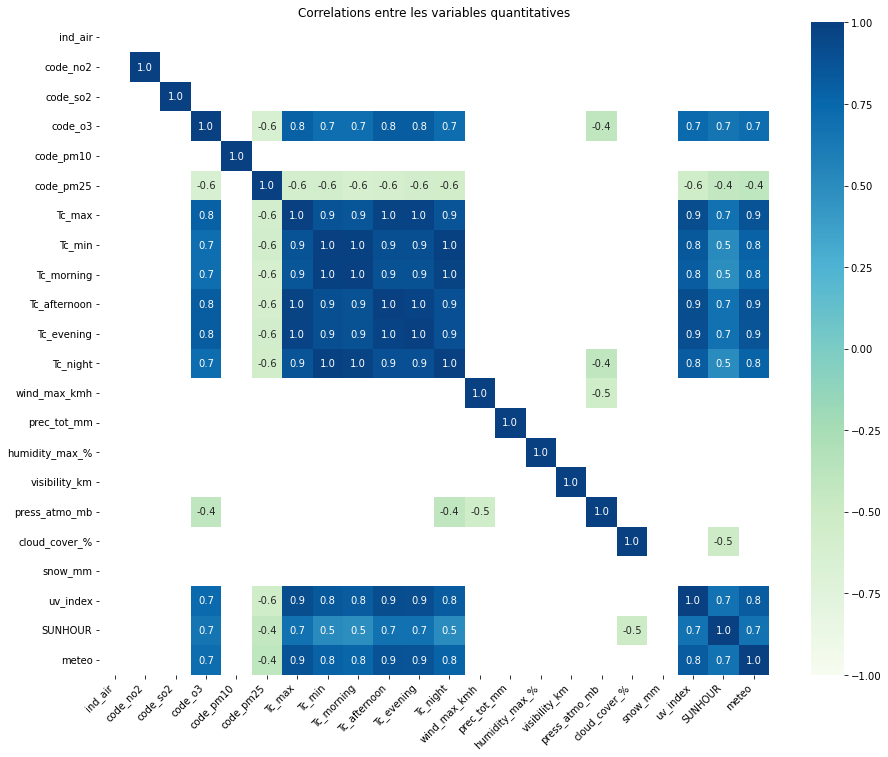

In [28]:
# Etude des corrélation uniquement pour ind_air = 4
df_4 = df[df['ind_air']== 4]
print(df_4.shape)
num_corr = df_4.corr()

num_corr = num_corr[abs(num_corr) >= 0.4]
plt.figure(figsize=(15, 12))
g = sns.heatmap(num_corr,
            annot=True,
            fmt='.1f',
            cmap='GnBu',
            vmin=-1,
            vmax=1)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
title = plt.title('Correlations entre les variables quantitatives')

En isolant l'ind_air = 4, on constate de forte corrélation entre code_O3 et des paramètres météorologiques. On constate également des corrélations négatives entre code_PM2.5 et certains paramètres météorologiques.

(904, 24)


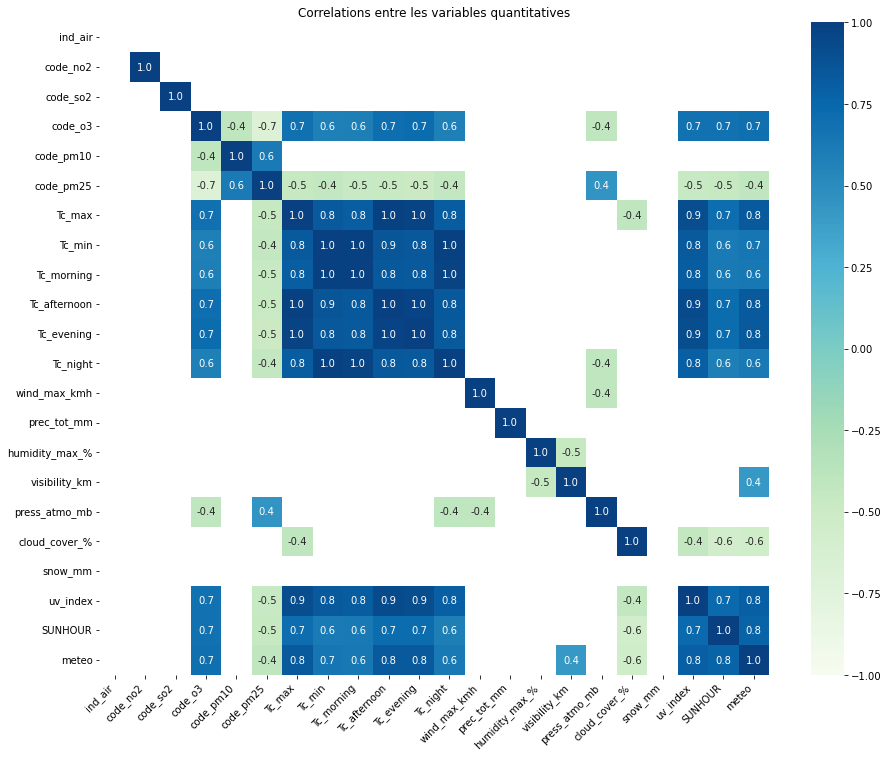

In [29]:
# Etude des corrélation uniquement pour ind_air = 3
df_3 = df[df['ind_air']== 3]
print(df_3.shape)
num_corr = df_3.corr()

num_corr = num_corr[abs(num_corr) >= 0.4]
plt.figure(figsize=(15, 12))
g = sns.heatmap(num_corr,
            annot=True,
            fmt='.1f',
            cmap='GnBu',
            vmin=-1,
            vmax=1)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
title = plt.title('Correlations entre les variables quantitatives')

Mêmes observations avec ind_air = 3

(4998, 24)


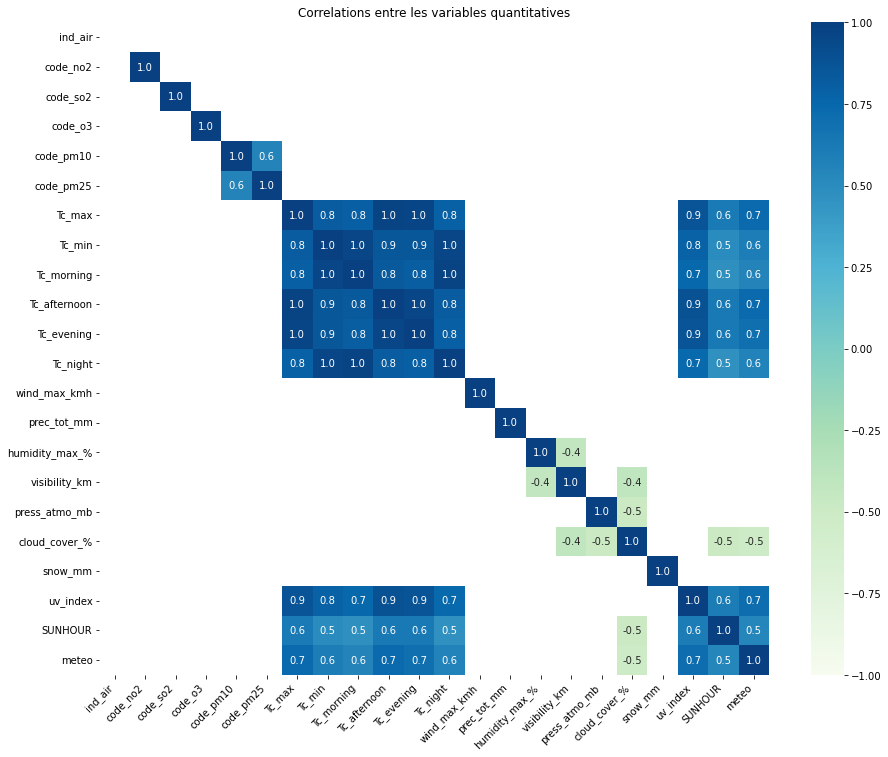

In [30]:
# Etude des corrélation uniquement pour ind_air = 2
df_2 = df[df['ind_air']== 2]
print(df_2.shape)
num_corr = df_2.corr()

num_corr = num_corr[abs(num_corr) >= 0.4]
plt.figure(figsize=(15, 12))
g = sns.heatmap(num_corr,
            annot=True,
            fmt='.1f',
            cmap='GnBu',
            vmin=-1,
            vmax=1)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
title = plt.title('Correlations entre les variables quantitatives')

En revanche, l'on ne constate pas de corrélations entre les codes polluants et les paramètres météo lorsque l'on isole ind_air = 2, alors que 76.5% des données concernent cet indice. 

(81, 24)


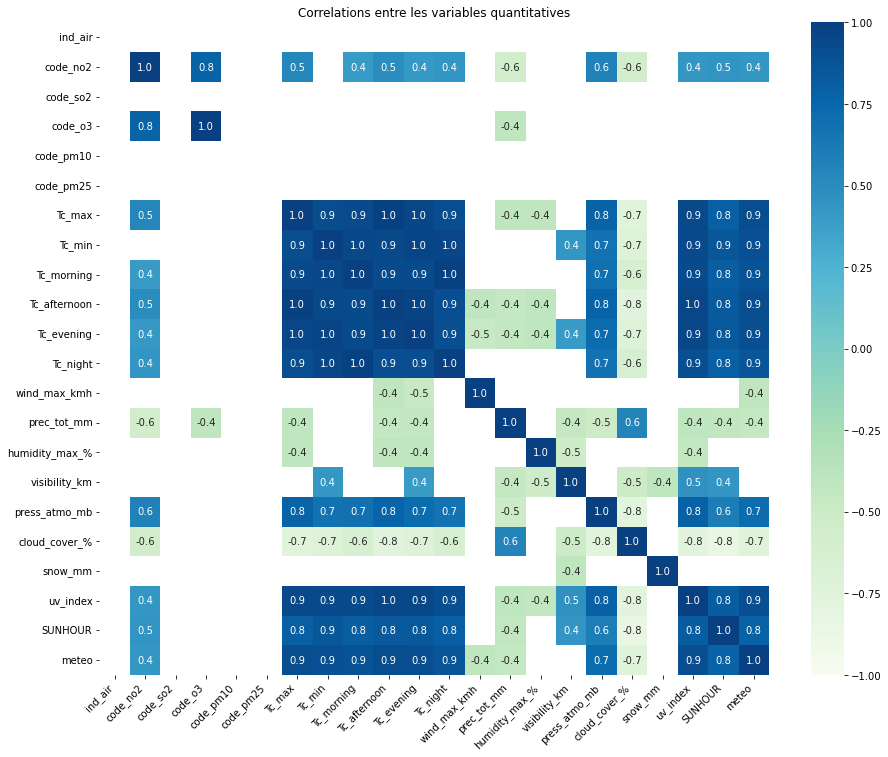

In [31]:
# Etude des corrélation uniquement pour ind_air = 1
df_1 = df[df['ind_air']== 1]
print(df_1.shape)
num_corr = df_1.corr()

num_corr = num_corr[abs(num_corr) >= 0.4]
plt.figure(figsize=(15, 12))
g = sns.heatmap(num_corr,
            annot=True,
            fmt='.1f',
            cmap='GnBu',
            vmin=-1,
            vmax=1)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
title = plt.title('Correlations entre les variables quantitatives')

En isolant l'ind_air = 1, on constate de forte corrélation entre code_NO2 et des paramètres météorologiques.

# 5) Etude graphique

In [32]:
# Evolution des températures maximales observées pour la ville d'amiens sur la période étudiée
# df_amiens = df[df['ville'] == 'AMIENS']
# fig = plt.figure(figsize=(15,5))
# plt.plot(df_amiens['date'], df_amiens['Tc_max'], label='Première courbe')

In [33]:
# Evolution de l'indice de la qualité de l'air pour la ville d'amiens sur la période étudiée
# fig = plt.figure(figsize=(15,5))
# plt.plot(df_amiens['date'], df_amiens['ind_air'], label='Première courbe')

In [34]:
# df['ind_air'].dtype

In [35]:
# sns.lmplot(x="Tc_max", y="prec_tot_mm", hue="ind_air", data=df, fit_reg=False)
# plt.show()

In [36]:
# fig = plt.figure(figsize=(15,10))
# plt.subplot(211)
# ax1 = sns.boxplot(x="ville", y='prec_tot_mm', data=df)
# plt.subplot(212)
# ax2 = sns.boxplot(x="ville", y='ind_air', data=df)
# plt.show()

In [37]:
# Suppression d'autres colonnes
df = df.drop(['Tc_morning', 'Tc_afternoon', 'Tc_evening', 'Tc_night', 'SUNHOUR'], axis=1)

In [38]:
df
df.to_csv('table1.csv')

# 6) Normalisation des variables quantitatives

In [39]:
# Normalisation des variables quantitatives
var_quant = ['Tc_max', 'Tc_min', 'wind_max_kmh', 'prec_tot_mm', 'humidity_max_%', 'visibility_km', 'press_atmo_mb', 'cloud_cover_%', 'snow_mm']
var_another = ['ville', 'ind_air', 'code_no2', 'code_so2', 'code_o3', 'code_pm10', 'code_pm25', 'uv_index', 'meteo']
mean = df[var_quant].mean()
et = df[var_quant].std()
df_norm =(df[var_quant] - mean) / et
df_norm[var_another] = df[var_another] 
df_norm

,Tc_max,Tc_min,wind_max_kmh,prec_tot_mm,humidity_max_%,visibility_km,press_atmo_mb,cloud_cover_%,snow_mm,ville,ind_air,code_no2,code_so2,code_o3,code_pm10,code_pm25,uv_index,meteo
0,-1.094417,-1.212267,-0.532223,-0.008954,-0.212019,-0.583017,-1.064070,1.109317,-0.073117,AMIENS,2,1,1,2,1,1,3,0
1,-0.557489,-1.212267,-0.634397,-0.351269,0.436161,-0.354877,-0.494246,-1.063469,-0.073117,AMIENS,2,1,1,2,1,1,2,0
2,0.337389,-1.212267,0.796033,0.113302,0.565797,-0.354877,-0.266316,0.353565,-0.073117,AMIENS,2,1,1,2,1,1,4,2
3,0.874317,0.724752,1.102553,0.895737,0.565797,-0.354877,-1.747860,0.748617,-0.073117,AMIENS,2,1,1,2,1,1,5,1
4,0.158414,0.509527,0.693859,0.137753,0.695432,0.329544,-1.405965,0.911791,-0.073117,AMIENS,2,1,1,2,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9948,-0.020562,-0.997043,-0.327876,-0.375720,1.213976,-0.354877,0.303509,-0.032899,-0.073117,VALENCIENNES,2,1,1,2,2,2,3,2
9949,0.516365,-1.212267,-0.430050,-0.375720,1.213976,-1.267438,0.645404,-1.278172,-0.073117,VALENCIENNES,3,2,1,2,2,3,4,3
9953,0.874317,-0.781818,-0.225703,-0.375720,0.436161,0.557684,0.987299,-1.621695,-0.073117,VALENCIENNES,3,1,1,3,2,2,5,3
9955,0.158414,-0.351370,-0.327876,-0.375720,-0.341655,0.557684,1.101264,0.950437,-0.073117,VALENCIENNES,3,1,1,2,2,3,3,1


# 7) Modélisation

In [40]:
# Utilisation d'un SMOTE pour équilibrer le jeu de données (Oversampling)

In [41]:
select = ['code_no2', 'code_so2', 'code_o3', 'code_pm10', 'code_pm25', 'Tc_max', 'Tc_min', 'wind_max_kmh', 'prec_tot_mm', 'cloud_cover_%', 'uv_index', 'meteo']
samp = SMOTE()
X = df_norm[select]
y = df_norm['ind_air']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
X_train, y_train =samp.fit_resample(X_train,y_train)

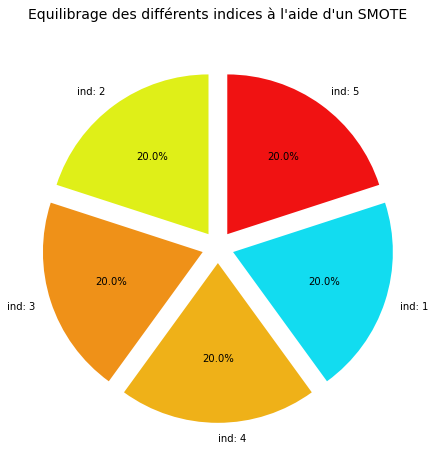

In [42]:
ind_air = y_train.value_counts()
fig, ax = plt.subplots(figsize=(7, 7))
labels = 'ind: 2', 'ind: 3', 'ind: 4', 'ind: 1', 'ind: 5'
colors = ['#DFEF18', '#EF9118', '#EFB118', '#12DCF0', '#F01212']
explode = (0.1, 0.1, 0.1, 0.1, 0.1)
ax.pie(ind_air, labels=labels, autopct='%1.1f%%', colors=colors, shadow=False, startangle=90, explode=explode)
ax.axis('equal')
plt.title('Equilibrage des différents indices à l\'aide d\'un SMOTE', fontsize=14, pad=40)
plt.show()

In [43]:
models =[("Logistic regression", LogisticRegression()),('KNN',KNeighborsClassifier()),
             ("Decision tree", DecisionTreeClassifier()),('Random forest',RandomForestClassifier())]

cv_score_list = []
model_name_list = []

for name ,model in models:
    model.fit(X_train, y_train)
    cv_score_list.append(round(cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5).mean(), 2))
    model_name_list.append(name)
    
print(f'X_train Shape: {X_train.shape}, y_train Shape: {y_train.shape}, X_test Shape: {X_test.shape}, y_test Shape: {y_test.shape} ')

df_result = pd.DataFrame(columns = ['model', 'cv score'])
df_result['model'] = model_name_list
df_result['cv score'] = cv_score_list
df_result.sort_values(by=['cv score'], ascending = False)

X_train Shape: (19890, 12), y_train Shape: (19890,), X_test Shape: (1301, 12), y_test Shape: (1301,) 


,model,cv score
2,Decision tree,1.00
3,Random forest,1.00
1,KNN,0.99
0,Logistic regression,0.91


# 8) Prédiction sur le test set et précision

              precision    recall  f1-score   support

           1       0.28      1.00      0.44        12
           2       0.98      0.83      0.90      1020
           3       0.45      0.76      0.57       165
           4       0.80      0.82      0.81       103
           5       0.10      1.00      0.18         1

    accuracy                           0.82      1301
   macro avg       0.52      0.88      0.58      1301
weighted avg       0.89      0.82      0.84      1301



<AxesSubplot:>

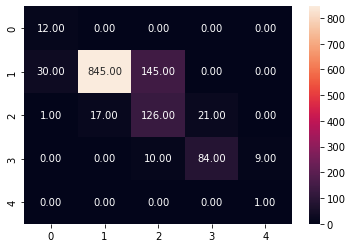

In [44]:
model = LogisticRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')

              precision    recall  f1-score   support

           1       0.67      1.00      0.80        12
           2       0.99      0.98      0.99      1020
           3       0.90      0.93      0.91       165
           4       0.98      0.95      0.97       103
           5       1.00      1.00      1.00         1

    accuracy                           0.97      1301
   macro avg       0.91      0.97      0.93      1301
weighted avg       0.97      0.97      0.97      1301



<AxesSubplot:>

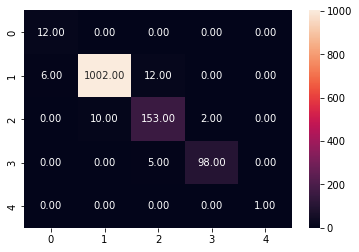

In [45]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00      1020
           3       0.97      0.99      0.98       165
           4       0.99      1.00      1.00       103
           5       1.00      1.00      1.00         1

    accuracy                           1.00      1301
   macro avg       0.99      1.00      0.99      1301
weighted avg       1.00      1.00      1.00      1301



<AxesSubplot:>

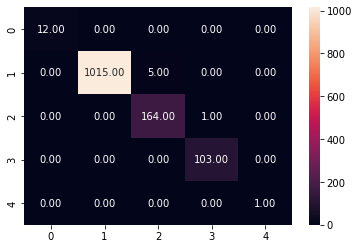

In [46]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')

              precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           2       1.00      1.00      1.00      1020
           3       0.99      0.97      0.98       165
           4       0.99      0.99      0.99       103
           5       1.00      1.00      1.00         1

    accuracy                           0.99      1301
   macro avg       0.97      0.99      0.98      1301
weighted avg       0.99      0.99      0.99      1301



<AxesSubplot:>

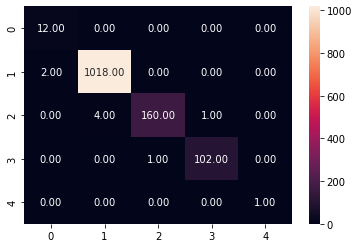

In [47]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')

# 9) Conclusion

- La première phase de ce projet a été de créer un jeu de données à partir d'open data (dont une API) concernant des indices de la qualité de l'air, des émissions polluantes, de paramètres météorologiques et du traffic routier, dans le but de prédire un indice de la qualité de l'air pour différentes villes des hauts de France.
Il a été difficile de rassembler des données sur une longue période et concernant une localisation précise (villes). Néanmoins, il a été possible de réunir des données (indice de la qualité de l'air, indice sur les polluants et paramètres météo) sur 19 villes de la région pour une période d'une année environ. Une table principale a ainsi été construite (air_quality_table.csv). En revanche, il n'a pas été possible de réunir des données historiques en ce qui concerne le traffic routier.

- La seconde phase a concerné le traitement et l'analyse du jeu des données, ainsi que la modélisation. Etant données le nombres de valeurs manquantes des mesures des polluants pour de nombreuses villes, il a été décidé de supprimer ces paramètres. Toutefois, les 'code_polluant' refletent parfaitement ces mesures car il s'agit de classe établie par ATMO. De plus, les paramètres météo les plus pertinants ont été sélectionné.
Du fait d'une grande disproportion des échantillons par rapport à l'indice de la qualité de l'air, Des données artificielles ont été créé à l'aide d'un SMOTE pour équilibrer le jeu de données et permettre une meilleur modélisation.
4 algorythmes de modélisation ont été étudié (régression linéaire, k les plus proches voisins, arbres de décisions et fôret aléatoire) et des prédictions ont pu être réalisé sur un jeu de données test avec une précision variant de 82 à 100%, notamment avec l'utilisation des arbres de décisions et de la fôret aléatoire. Etant donné la tès bonne précision des modélisations, il n'a pas été jugé utile d'effectuer une cross validation ou d'étudier les hyper-paramètres.